In [1]:
import json
import time

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

from pydantic import BaseModel
from typing import List, Optional

from selenium import webdriver

from supabase import create_client, Client

import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns

In [2]:
driver = webdriver.Chrome()

In [3]:
whoscored_url = 'https://1xbet.whoscored.com/Matches/1821600/Live/Spain-LaLiga-2024-2025-Mallorca-Barcelona'

In [4]:
driver.get(whoscored_url)

In [5]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [6]:
element = soup.select_one('script:-soup-contains("matchCentreData")')

In [7]:
matchdict = json.loads(element.text.split("matchCentreData: ")[1].split(',\n')[0])

In [8]:
match_events = matchdict['events']

In [9]:
df = pd.DataFrame(match_events)

In [10]:
df.dropna(subset='playerId', inplace=True)

In [11]:
df = df.where(pd.notnull(df), None)

In [12]:
df = df.rename(
    {
        'eventId': 'event_id',
        'expandedMinute': 'expanded_minute',
        'outcomeType': 'outcome_type',
        'isTouch': 'is_touch',
        'playerId': 'player_id',
        'teamId': 'team_id',
        'endX': 'end_x',
        'endY': 'end_y',
        'blockedX': 'blocked_x',
        'blockedY': 'blocked_y',
        'goalMouthZ': 'goal_mouth_z',
        'goalMouthY': 'goal_mouth_y',
        'isShot': 'is_shot',
        'cardType': 'card_type',
        'isGoal': 'is_goal'
    },
    axis=1
)

In [13]:
df['period_display_name'] = df['period'].apply(lambda x: x['displayName'])
df['type_display_name'] = df['type'].apply(lambda x: x['displayName'])
df['outcome_type_display_name'] = df['outcome_type'].apply(lambda x: x['displayName'])

In [14]:
df.drop(columns=["period", "type", "outcome_type"], inplace=True)

In [15]:
if 'is_goal' not in df.columns:
    print('missing goals')
    df['is_goal'] = False

In [16]:
df.head()

,id,event_id,minute,team_id,player_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,...,card_type,goal_mouth_z,goal_mouth_y,is_goal,is_shot,blocked_x,blocked_y,period_display_name,type_display_name,outcome_type_display_name
0,2.754938e+09,11015,0,51,425092.0,60.3,16.8,0,[],[61],...,None,NaN,NaN,None,None,NaN,NaN,FirstHalf,OffsideGiven,Unsuccessful
3,2.754927e+09,3,0,51,425092.0,50.1,50.1,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 215, 218]",...,None,NaN,NaN,None,None,NaN,NaN,FirstHalf,Pass,Successful
4,2.754927e+09,4,0,51,349660.0,31.9,53.6,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 35, 37, 215, 218]",...,None,NaN,NaN,None,None,NaN,NaN,FirstHalf,Pass,Successful
5,2.754927e+09,5,0,51,294006.0,25.6,74.9,0,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",...,None,NaN,NaN,None,None,NaN,NaN,FirstHalf,Pass,Successful
6,2.754927e+09,6,0,51,423420.0,8.9,47.2,0,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 120, 128, 36, 38, 216, 218]",...,None,NaN,NaN,None,None,NaN,NaN,FirstHalf,Pass,Unsuccessful


In [17]:
selected = df[['minute','second', 'player_id', 'type_display_name', 'outcome_type_display_name', 'x', 'y', 'end_x', 'end_y']]

In [28]:
filtered = selected[selected['player_id'] == 106885]

In [29]:
final = filtered[filtered['type_display_name'] == 'Pass']

In [30]:
final['x'] = final['x']*1.2
final['end_x'] = final['end_x']*1.2

final['y'] = final['y']*0.8
final['end_y'] = final['end_y']*0.8

C:\Users\risha\AppData\Local\Temp\ipykernel_21836\1497007985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['x'] = final['x']*1.2
C:\Users\risha\AppData\Local\Temp\ipykernel_21836\1497007985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['end_x'] = final['end_x']*1.2
C:\Users\risha\AppData\Local\Temp\ipykernel_21836\1497007985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [31]:
final

,minute,second,player_id,type_display_name,outcome_type_display_name,x,y,end_x,end_y
7,0,11.0,106885.0,Pass,Unsuccessful,44.88,50.48,70.32,48.72
16,0,31.0,106885.0,Pass,Unsuccessful,50.52,65.68,53.88,70.24
20,1,1.0,106885.0,Pass,Successful,43.92,59.84,40.68,31.52
25,1,11.0,106885.0,Pass,Successful,23.88,73.92,31.08,76.96
28,1,16.0,106885.0,Pass,Unsuccessful,11.88,74.88,19.68,80.00
...,...,...,...,...,...,...,...,...,...
1371,89,26.0,106885.0,Pass,Successful,49.20,46.24,43.80,28.88
1373,89,33.0,106885.0,Pass,Successful,37.08,51.68,49.68,42.48
1390,90,39.0,106885.0,Pass,Successful,15.84,57.20,19.20,72.72
1394,91,6.0,106885.0,Pass,Successful,37.44,69.68,23.52,48.48


In [32]:
final_successful = final[final['outcome_type_display_name'] == 'Successful']

In [33]:
final_unsuccessful = final[final['outcome_type_display_name'] == 'Unsuccessful']

In [34]:
final_successful

,minute,second,player_id,type_display_name,outcome_type_display_name,x,y,end_x,end_y
20,1,1.0,106885.0,Pass,Successful,43.92,59.84,40.68,31.52
25,1,11.0,106885.0,Pass,Successful,23.88,73.92,31.08,76.96
60,3,24.0,106885.0,Pass,Successful,64.92,72.40,88.92,76.24
69,3,47.0,106885.0,Pass,Successful,62.64,61.36,82.32,75.36
109,6,25.0,106885.0,Pass,Successful,39.36,50.88,43.92,39.76
...,...,...,...,...,...,...,...,...,...
1371,89,26.0,106885.0,Pass,Successful,49.20,46.24,43.80,28.88
1373,89,33.0,106885.0,Pass,Successful,37.08,51.68,49.68,42.48
1390,90,39.0,106885.0,Pass,Successful,15.84,57.20,19.20,72.72
1394,91,6.0,106885.0,Pass,Successful,37.44,69.68,23.52,48.48


In [35]:
final_unsuccessful

,minute,second,player_id,type_display_name,outcome_type_display_name,x,y,end_x,end_y
7,0,11.0,106885.0,Pass,Unsuccessful,44.88,50.48,70.32,48.72
16,0,31.0,106885.0,Pass,Unsuccessful,50.52,65.68,53.88,70.24
28,1,16.0,106885.0,Pass,Unsuccessful,11.88,74.88,19.68,80.00
220,13,16.0,106885.0,Pass,Unsuccessful,50.40,57.68,92.28,46.08
229,14,3.0,106885.0,Pass,Unsuccessful,49.44,71.76,51.12,72.24
275,16,22.0,106885.0,Pass,Unsuccessful,33.24,35.36,73.56,51.36
344,19,28.0,106885.0,Pass,Unsuccessful,76.80,66.16,91.20,71.44
362,20,50.0,106885.0,Pass,Unsuccessful,37.80,67.52,39.00,67.52
394,22,13.0,106885.0,Pass,Unsuccessful,67.32,70.16,104.88,75.28
676,40,50.0,106885.0,Pass,Unsuccessful,15.00,75.76,71.16,60.08


(0.0, 80.0)

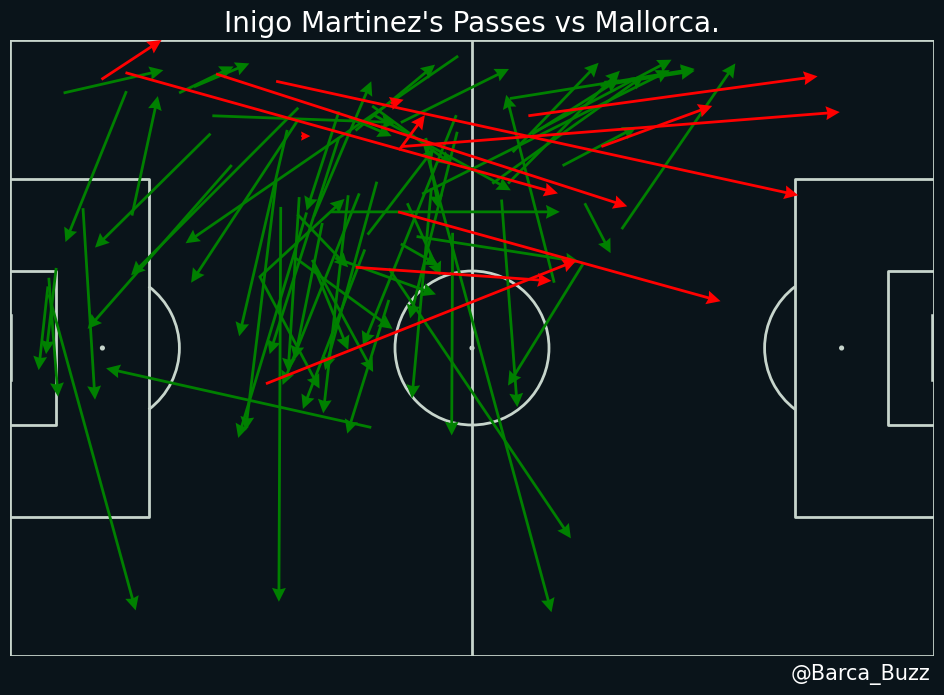

In [38]:
pitch = Pitch(pitch_type='statsbomb',
                      pitch_color='#0a141a', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#0a141a')

plt.gca().invert_yaxis()

pitch.arrows(final_successful.x, final_successful.y, final_successful.end_x, final_successful.end_y, width=2,
             headwidth=5, headlength=5, color='green', ax=ax, label='Completed Passes')

pitch.arrows(final_unsuccessful.x, final_unsuccessful.y, final_unsuccessful.end_x, final_unsuccessful.end_y, width=2,
             headwidth=5, headlength=5, color='red', ax=ax, label='Completed Passes')


plt.title("Inigo Martinez's Passes vs Mallorca.", fontsize = 20, c = 'w')

endnote = "@Barca_Buzz"
plt.figtext(0.8, 0.1, endnote, ha="center", va="top", fontsize=15, color="white")

plt.xlim(0,120)
plt.ylim(0,80)